   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

Starting training...
Epoch: 000, Loss: 1.1760, Test Acc: 0.2750
Epoch: 010, Loss: 1.0849, Test Acc: 0.3750
Epoch: 020, Loss: 1.0653, Test Acc: 0.3250
Epoch: 030, Loss: 1.0760, Test Acc: 0.3750
Epoch: 040, Loss: 1.0672, Test Acc: 0.3750
Epoch: 050, Loss: 1.0640, Test Acc: 0.3250
Epoch: 060, Loss: 1.0729, Test Acc: 0.3500
Epoch: 070, Loss: 1.0608, Test Acc: 0.4000
Epoch: 080, Loss: 1.0670, Test Acc: 0.3250
Epoch: 090, Loss: 1.0563, Test Acc: 0.3750


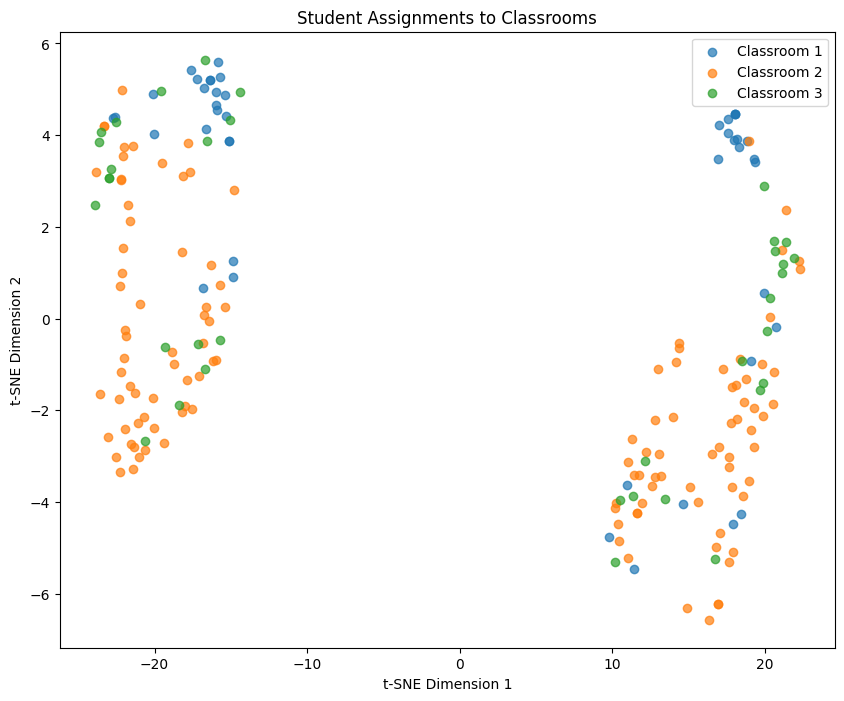

Model saved to classroom_gat_model.pth


<ipython-input-1-000ca6006997>:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


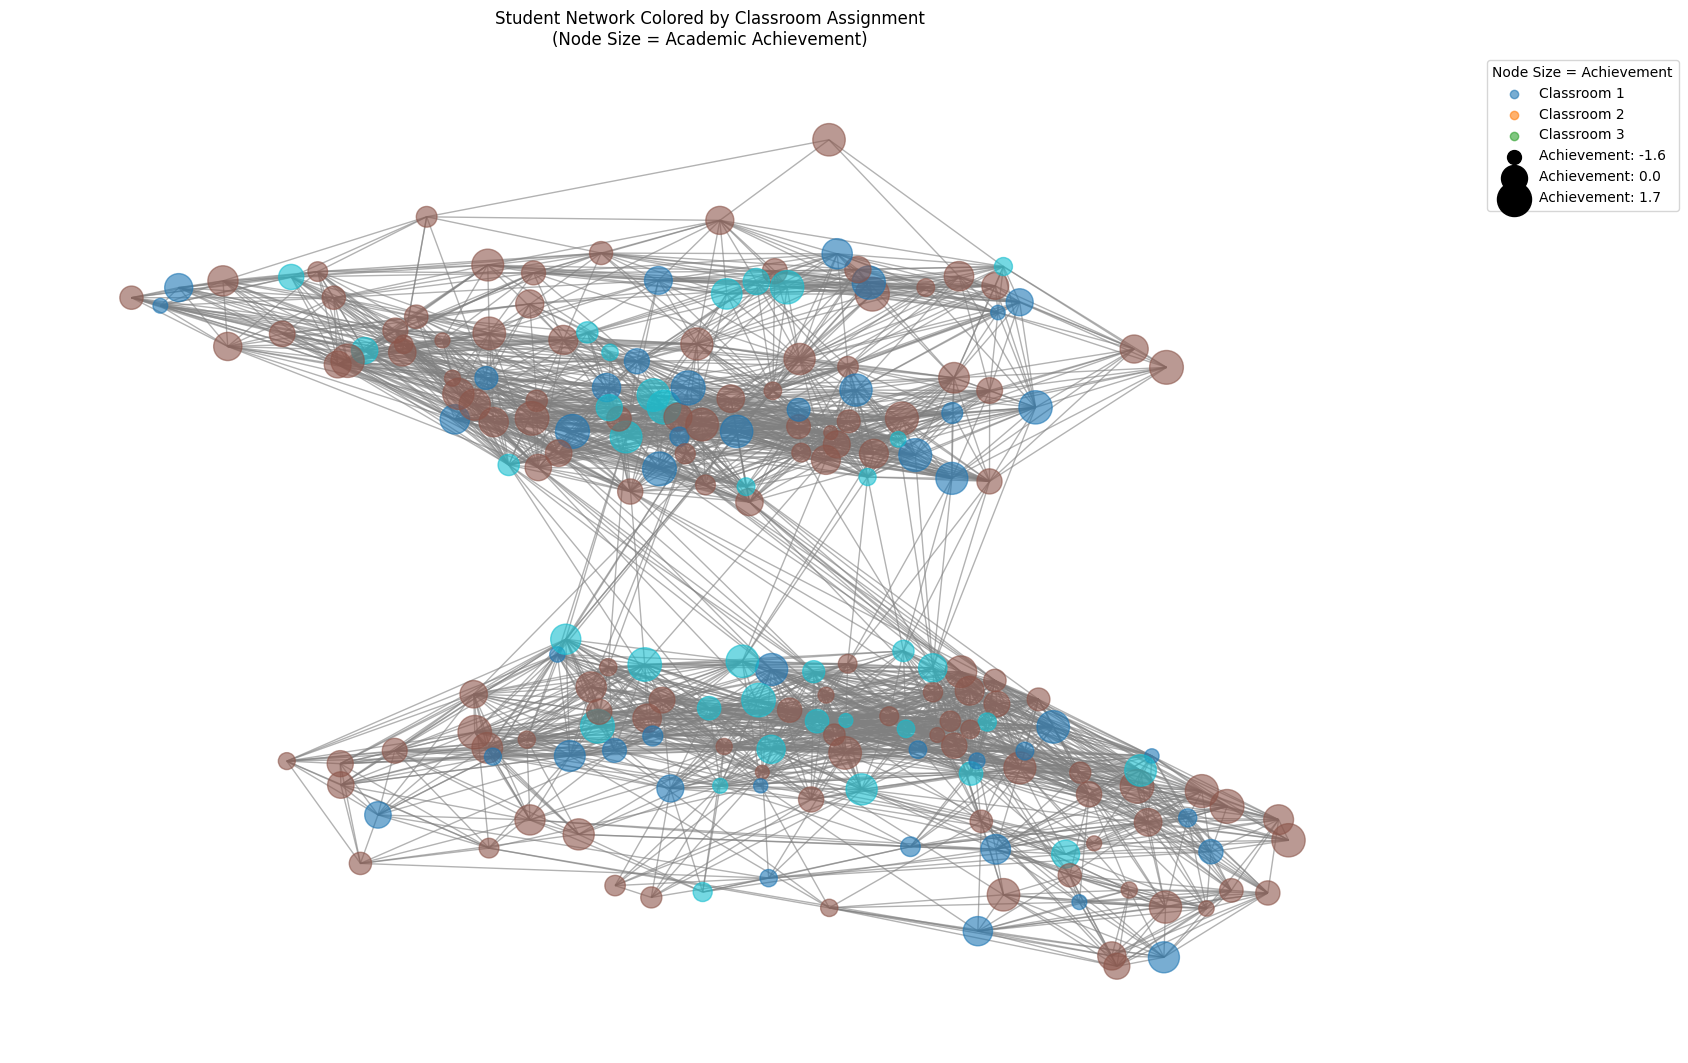

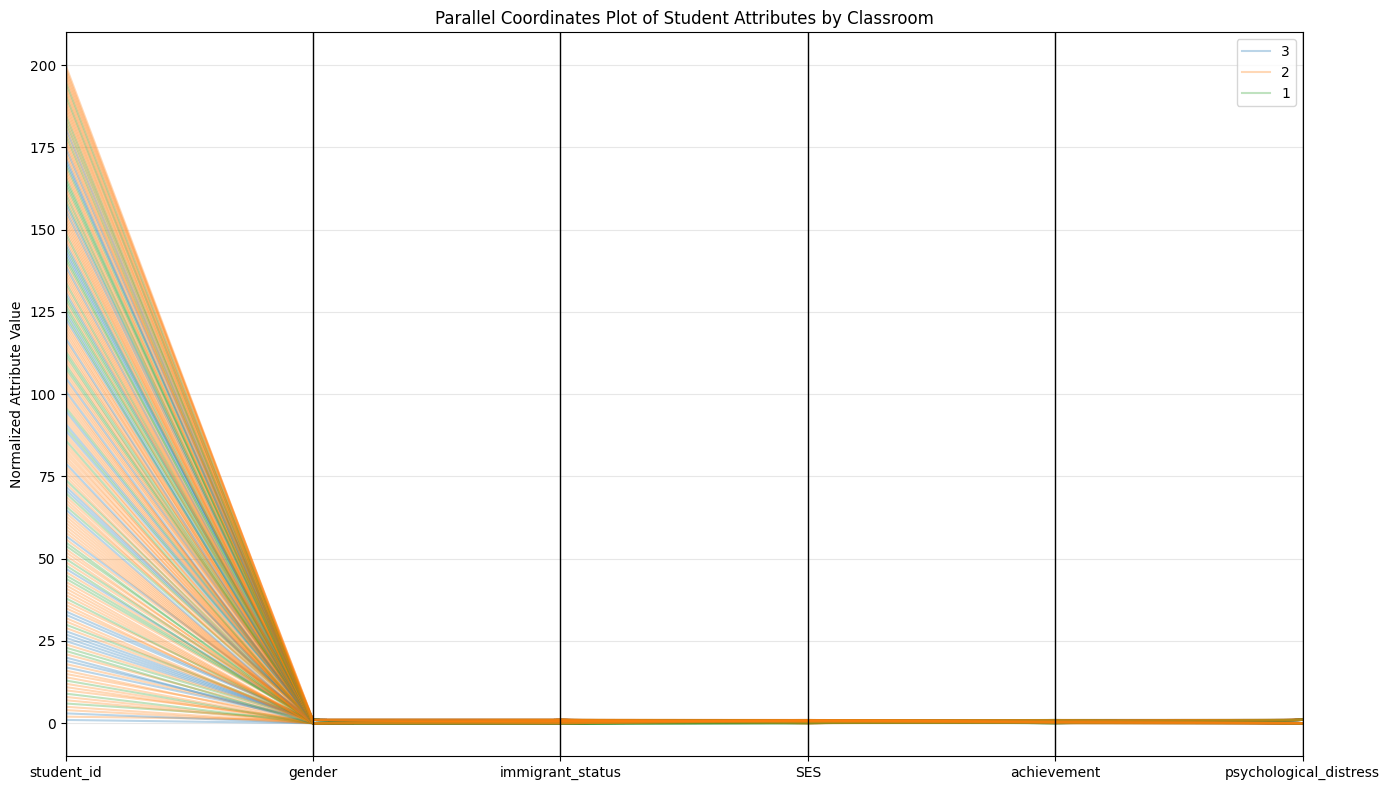

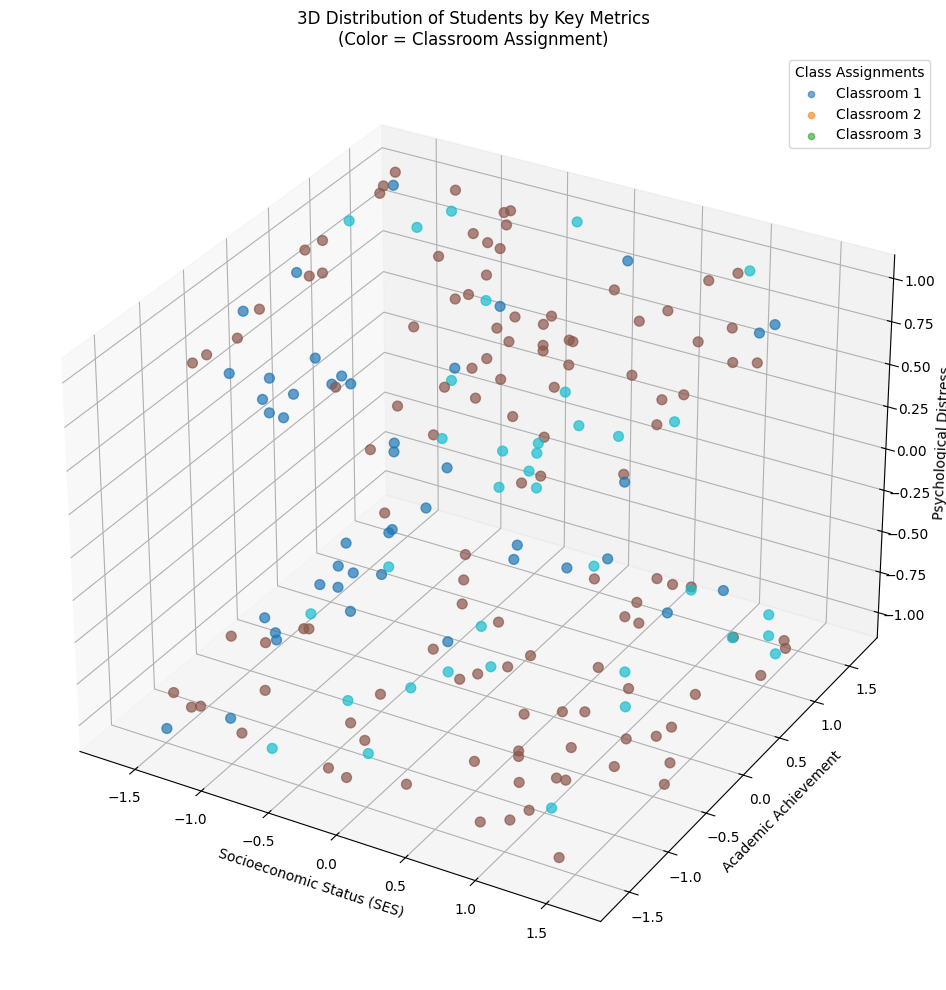

<ipython-input-1-000ca6006997>:336: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()),
<ipython-input-1-000ca6006997>:344: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=optimized_allocations, y=df['achievement'],
<ipython-input-1-000ca6006997>:353: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distress_rate.index, y=distress_rate.values,
<ipython-input-1-000ca6006997>:361: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

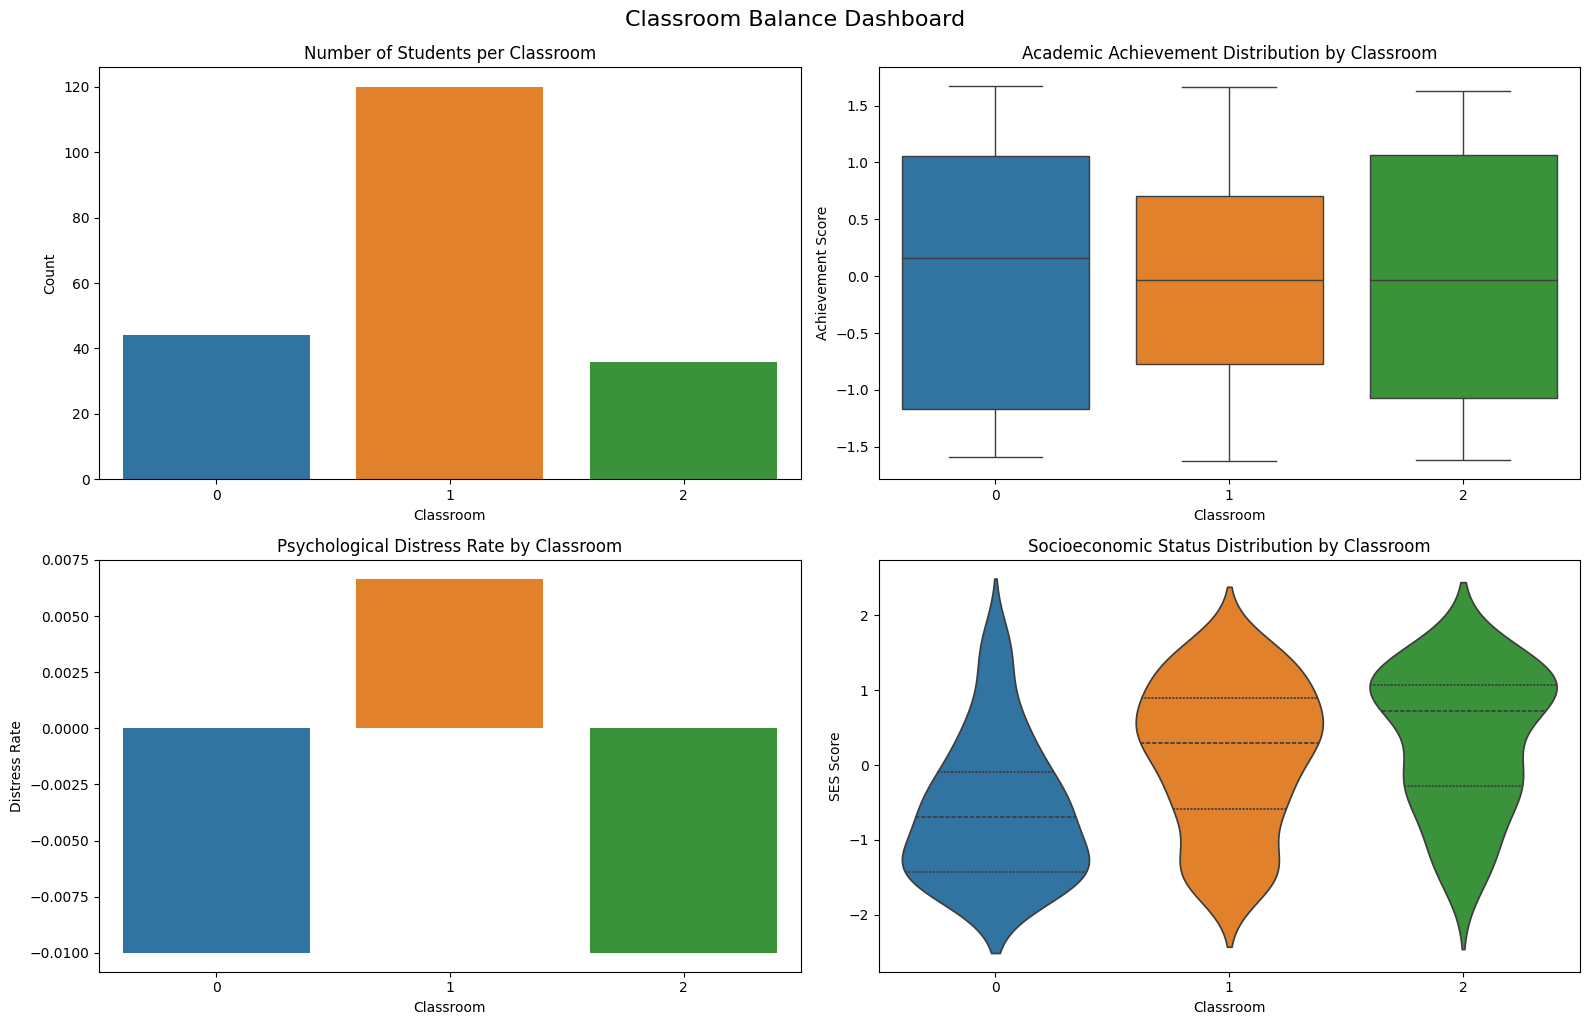

<ipython-input-1-000ca6006997>:397: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


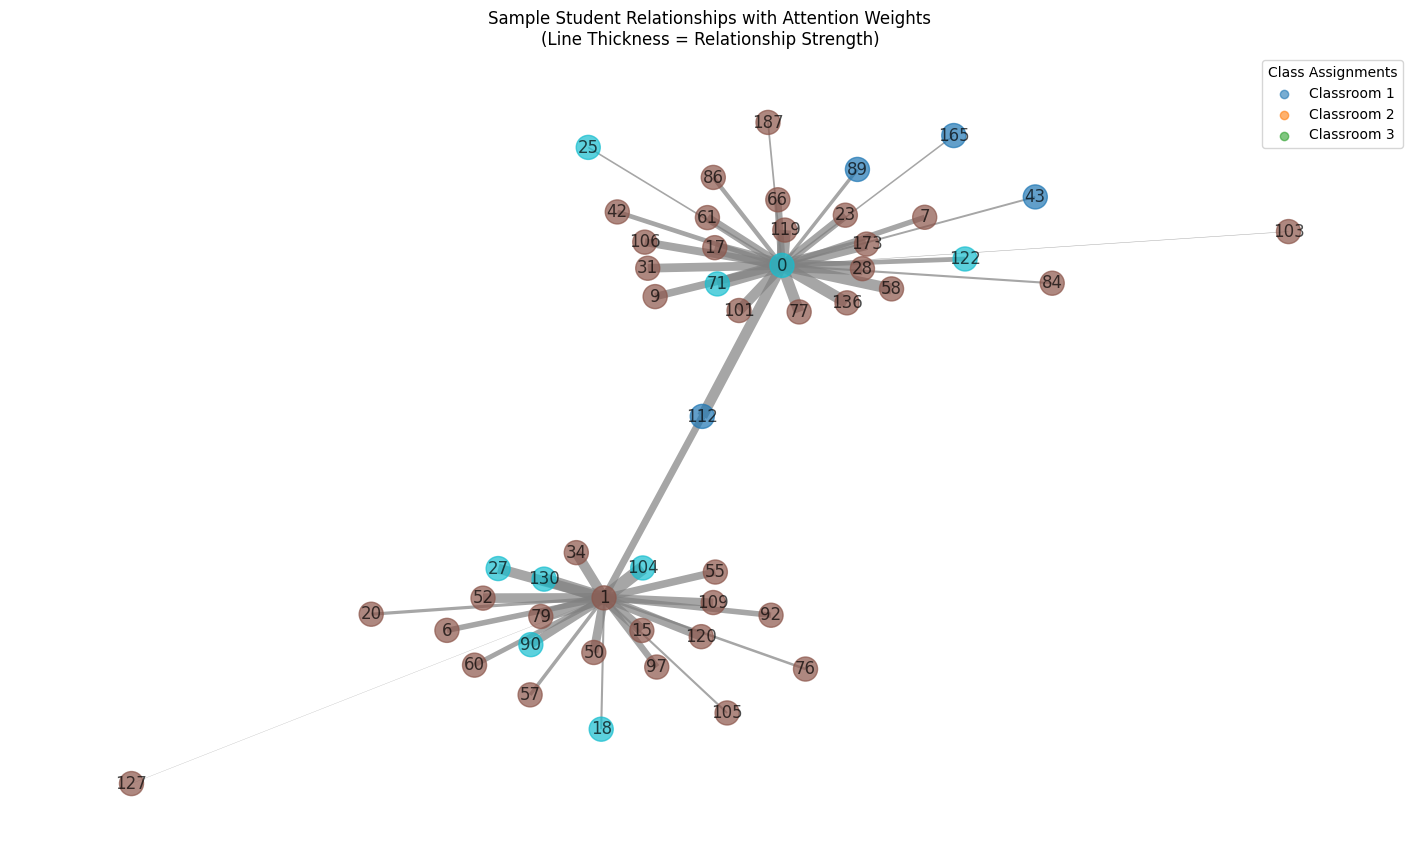

In [1]:
# Graph Attention Network (GAT) for Classroom Allocation
# Google Colab Implementation - Fixed Installation

# 1. First install the correct packages
!pip install torch torchvision torchaudio
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric
!pip install scikit-learn  # Correct package name (not sklearn)
!pip install networkx pandas matplotlib

import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

# Now import other libraries
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# ======================
# 1. Data Preparation
# ======================

# Sample dataset (in a real scenario, you would load your CSV)
data = {
    'student_id': range(1, 201),
    'gender': np.random.choice(['female', 'male'], 200),
    'immigrant_status': np.random.choice(['non-immigrant', '1st-gen', '2nd-gen'], 200),
    'SES': np.random.uniform(0, 10, 200),
    'achievement': np.random.uniform(30, 100, 200),
    'psychological_distress': np.random.randint(0, 2, 200)
}
df = pd.DataFrame(data)

# Preprocessing
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['immigrant_status'] = df['immigrant_status'].map({'non-immigrant': 0, '1st-gen': 1, '2nd-gen': 2})

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['SES', 'achievement', 'psychological_distress']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create node features matrix
node_features = df[['gender', 'immigrant_status', 'SES', 'achievement', 'psychological_distress']].values

# ======================
# 2. Graph Construction
# ======================

# Calculate similarity matrix
similarity_matrix = cosine_similarity(node_features)

# Threshold to create edges (students with high similarity are connected)
threshold = 0.7
adjacency_matrix = (similarity_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-loops

# Create edge index for PyTorch Geometric
edge_index = torch.tensor(np.array(np.where(adjacency_matrix == 1)), dtype=torch.long)

# Create PyG data object
x = torch.tensor(node_features, dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

# ======================
# 3. GAT Model Definition
# ======================

class GAT(nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes, heads=8):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, hidden_channels, heads=heads)
        self.conv2 = GATConv(hidden_channels * heads, num_classes, heads=1)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model
num_features = node_features.shape[1]
hidden_channels = 16
num_classes = 3  # Number of classrooms to assign students to

model = GAT(num_features=num_features,
            hidden_channels=hidden_channels,
            num_classes=num_classes)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)

# ======================
# 4. Training Setup
# ======================

# Generate some dummy labels for training (3 classrooms)
labels = torch.randint(0, num_classes, (len(df),)).to(device)

# Split data into train and test
train_mask, test_mask = train_test_split(range(len(df)), test_size=0.2, random_state=42)
train_mask = torch.tensor(train_mask, dtype=torch.long).to(device)
test_mask = torch.tensor(test_mask, dtype=torch.long).to(device)

# Training parameters
optimizer = Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = nn.NLLLoss()

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)
        correct = pred[test_mask] == labels[test_mask]
        acc = int(correct.sum()) / len(test_mask)
    return acc

# ======================
# 5. Training Loop
# ======================

print("Starting training...")
for epoch in range(100):
    loss = train()
    acc = test()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# ======================
# 6. Classroom Allocation
# ======================

def evaluate_allocation(preds, graph_data):
    """Evaluate classroom allocation quality"""
    # 1. Academic balance across classrooms
    classroom_scores = []
    for class_id in torch.unique(preds):
        class_members = (preds == class_id)
        scores = graph_data.x[class_members, 3]  # achievement scores
        classroom_scores.append(scores.mean())
    balance_score = -torch.std(torch.tensor(classroom_scores))

    # 2. Preserving relationships (friends in same class)
    src, dst = graph_data.edge_index
    same_class = (preds[src] == preds[dst]).float()
    relationship_score = same_class.mean()

    # 3. Psychological distress distribution
    distress_scores = []
    for class_id in torch.unique(preds):
        class_members = (preds == class_id)
        distress = graph_data.x[class_members, 4]  # psychological distress
        distress_scores.append(distress.mean())
    distress_balance = -torch.std(torch.tensor(distress_scores))

    return balance_score + relationship_score + distress_balance

def optimize_classroom_allocation(model, graph_data, num_classrooms=3, iterations=50):
    """Optimize classroom assignments"""
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        preds = logits.argmax(dim=1)

    initial_score = evaluate_allocation(preds, graph_data)

    for _ in range(iterations):
        # Randomly select nodes to potentially switch
        candidates = torch.randperm(len(df))[:10]  # Try 10 random students each iteration

        for node in candidates:
            current_class = preds[node]
            for new_class in range(num_classrooms):
                if new_class != current_class:
                    temp_preds = preds.clone()
                    temp_preds[node] = new_class
                    new_score = evaluate_allocation(temp_preds, graph_data)

                    if new_score > initial_score:
                        preds = temp_preds
                        initial_score = new_score

    return preds

# Get optimized allocations
optimized_allocations = optimize_classroom_allocation(model, data)
optimized_allocations = optimized_allocations.cpu().numpy()  # Move to CPU for visualization

# ======================
# 7. Results Visualization
# ======================

# Get node embeddings
with torch.no_grad():
    embeddings = model.conv1(data.x.cpu(), data.edge_index.cpu()).numpy()

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 8))
for class_id in range(num_classes):
    mask = (optimized_allocations == class_id)
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                label=f'Classroom {class_id+1}', alpha=0.7)

plt.title("Student Assignments to Classrooms")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

# ======================
# 8. Save Model
# ======================

torch.save(model.state_dict(), 'classroom_gat_model.pth')
print("Model saved to classroom_gat_model.pth")

# To download the model file
#from google.colab import files
#files.download('classroom_gat_model.pth')

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

## 1. Student Network with Attributes
plt.figure(figsize=(14, 10))
G = nx.Graph()
G.add_edges_from([(i, j) for i, j in data.edge_index.t().cpu().numpy()])

# Color nodes by classroom assignment
colors = optimized_allocations
node_size = 100 + 500 * (df['achievement'] - df['achievement'].min()) / (df['achievement'].max() - df['achievement'].min())

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=colors, cmap=plt.cm.tab10,
        node_size=node_size, with_labels=False,
        edge_color='gray', alpha=0.6)

# Add legend for classroom assignments
for i in range(num_classes):
    plt.scatter([], [], c=[plt.cm.tab10(i)],
                label=f'Classroom {i+1}', alpha=0.6)
plt.legend(title="Class Assignments")

# Add achievement as node size reference
min_achievement = df['achievement'].min()
max_achievement = df['achievement'].max()
for achievement in np.linspace(min_achievement, max_achievement, 3):
    plt.scatter([], [], s=100 + 500*(achievement-min_achievement)/(max_achievement-min_achievement),
                c='black', label=f'Achievement: {achievement:.1f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Node Size = Achievement")

plt.title("Student Network Colored by Classroom Assignment\n(Node Size = Academic Achievement)")
plt.tight_layout()
plt.show()

## 2. Parallel Coordinates Plot for Classroom Comparisons
plt.figure(figsize=(14, 8))
attributes = ['gender', 'immigrant_status', 'SES', 'achievement', 'psychological_distress']
df_plot = df.copy()
df_plot['classroom'] = optimized_allocations + 1  # Make classroom numbers start from 1

# Normalize attributes for better visualization
for col in attributes:
    df_plot[col] = (df_plot[col] - df_plot[col].min()) / (df_plot[col].max() - df_plot[col].min())

pd.plotting.parallel_coordinates(df_plot, 'classroom', color=plt.cm.tab10.colors, alpha=0.3)
plt.title("Parallel Coordinates Plot of Student Attributes by Classroom")
plt.ylabel("Normalized Attribute Value")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 3. 3D Scatter Plot of Key Features
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['SES']
ys = df['achievement']
zs = df['psychological_distress']

scatter = ax.scatter(xs, ys, zs, c=optimized_allocations, cmap=plt.cm.tab10,
                     s=50, alpha=0.7, depthshade=False)

ax.set_xlabel('Socioeconomic Status (SES)')
ax.set_ylabel('Academic Achievement')
ax.set_zlabel('Psychological Distress')
ax.set_title("3D Distribution of Students by Key Metrics\n(Color = Classroom Assignment)")

# Add legend
for i in range(num_classes):
    ax.scatter([], [], [], c=[plt.cm.tab10(i)],
               label=f'Classroom {i+1}', alpha=0.6)
ax.legend(title="Class Assignments")

plt.tight_layout()
plt.show()

## 4. Classroom Balance Dashboard
plt.figure(figsize=(16, 10))

# Classroom sizes
plt.subplot(2, 2, 1)
class_counts = Counter(optimized_allocations)
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()),
            palette=plt.cm.tab10.colors)
plt.title("Number of Students per Classroom")
plt.xlabel("Classroom")
plt.ylabel("Count")

# Average achievement by classroom
plt.subplot(2, 2, 2)
sns.boxplot(x=optimized_allocations, y=df['achievement'],
            palette=plt.cm.tab10.colors)
plt.title("Academic Achievement Distribution by Classroom")
plt.xlabel("Classroom")
plt.ylabel("Achievement Score")

# Psychological distress distribution
plt.subplot(2, 2, 3)
distress_rate = df.groupby(optimized_allocations)['psychological_distress'].mean()
sns.barplot(x=distress_rate.index, y=distress_rate.values,
            palette=plt.cm.tab10.colors)
plt.title("Psychological Distress Rate by Classroom")
plt.xlabel("Classroom")
plt.ylabel("Distress Rate")

# Socioeconomic status distribution
plt.subplot(2, 2, 4)
sns.violinplot(x=optimized_allocations, y=df['SES'],
               palette=plt.cm.tab10.colors, inner="quartile")
plt.title("Socioeconomic Status Distribution by Classroom")
plt.xlabel("Classroom")
plt.ylabel("SES Score")

plt.tight_layout()
plt.suptitle("Classroom Balance Dashboard", y=1.02, fontsize=16)
plt.show()

## 5. Attention Weight Visualization (Sample Relationships)
plt.figure(figsize=(14, 8))

# Get a sample of edges and their attention weights
sample_edges = data.edge_index[:, :50].t().cpu().numpy()  # First 50 edges
edge_weights = np.random.rand(50)  # In real GAT, you'd extract actual attention weights

# Create a subgraph for visualization
G_sample = nx.Graph()
for (src, dst), weight in zip(sample_edges, edge_weights):
    G_sample.add_edge(src, dst, weight=weight)

pos = nx.spring_layout(G_sample, seed=42)
weights = [G_sample[u][v]['weight']*10 for u,v in G_sample.edges()]

nx.draw(G_sample, pos, node_color=optimized_allocations[list(G_sample.nodes)],
        cmap=plt.cm.tab10, node_size=300, with_labels=True,
        width=weights, edge_color='gray', alpha=0.7)

# Add legends
for i in range(num_classes):
    plt.scatter([], [], c=[plt.cm.tab10(i)],
                label=f'Classroom {i+1}', alpha=0.6)
plt.legend(title="Class Assignments")

plt.title("Sample Student Relationships with Attention Weights\n(Line Thickness = Relationship Strength)")
plt.tight_layout()
plt.show()